<a href="https://colab.research.google.com/github/laistebas/projeto_machine_learning/blob/main/projeto_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **Dataset**

In [ ]:
# Carregando o dataset
dataset = pd.read_csv('/content/drive/MyDrive/Projetos/estudo_salario/dataset.csv')

# **Dados**

In [ ]:
# Linhas e colunas
dataset.shape

(500, 2)

In [ ]:
# Listando as colunas
dataset.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [ ]:
# Amostra dos dados
dataset.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [ ]:
# Resumo das variáveis
# Indexação em python começa por 0
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# **Análise exploratória**

In [ ]:
# Verificando valores ausentes
dataset.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [ ]:
# Coeficiente de correlação
# Proximo de +1 - positiva / Menor que -1 - negativa / 0 - sem correlação
dataset.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Forte correlação entre a variável preditora (horas de estudo) e a variável alvo (salário).

In [ ]:
# Resumo estatístico do dataset
# Verificar se tem discrepância ou outlier
dataset.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [ ]:
# Resumo estatístico da variável preditora
dataset["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

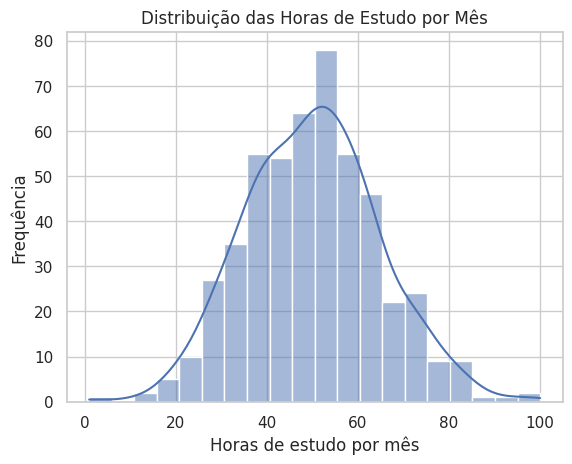

In [ ]:
# Estilo do histograma
custom_palette = sns.color_palette("RdBu_r", n_colors=10)
sns.set_palette(custom_palette)
sns.set(style="whitegrid")

# Histograma da variavél preditora
sns.histplot(data = dataset, x = "horas_estudo_mes", kde = True)

# Rótulos e Título
plt.xlabel("Horas de estudo por mês")
plt.ylabel("Frequência")
plt.title("Distribuição das Horas de Estudo por Mês")

# Adicionar grade
plt.grid(True)

# Mostrar o gráfico
plt.show()

# **Preparação dos dados**

In [ ]:
# Preparando a variável de entrada em x
# Recebendo os dados em formato de matriz
x = np.array(dataset['horas_estudo_mes'])

In [ ]:
# tipo de formato
type(x)

numpy.ndarray

In [ ]:
# Ajustando o shape de x
x = x.reshape(-1, 1)

In [ ]:
# Preparando a variável alvo
y = dataset['salario']

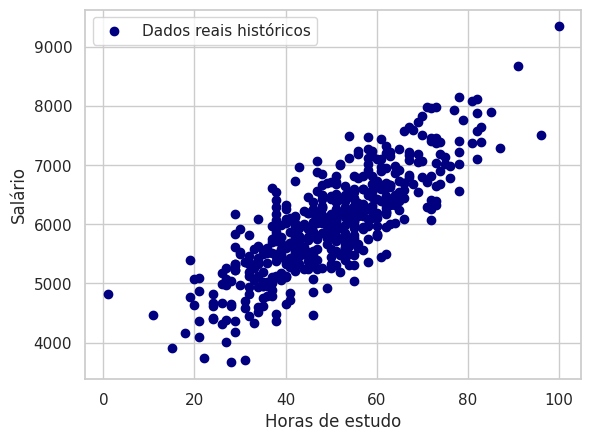

In [ ]:
# Gráfico de dispersão entre x e y
# Análise bi-dimensional entre duas variáveis
plt.scatter(x, y, color = "navy", label = "Dados reais históricos")
plt.xlabel("Horas de estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()


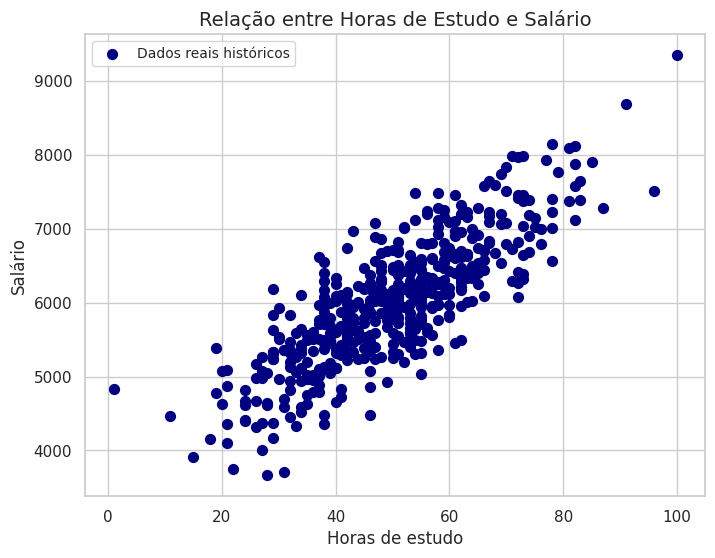

In [ ]:
# Deixando o gráfico mais apresentável

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Ajustando os dados
plt.scatter(x, y, color="navy", marker="o", s=50, label="Dados reais históricos")
plt.xlabel("Horas de estudo", fontsize=12)
plt.ylabel("Salário", fontsize=12)
plt.title("Relação entre Horas de Estudo e Salário", fontsize=14)
plt.legend(fontsize=10)

plt.show()

A medida que aumenta as horas de estudo, consequentemente o salário também aumento. Indicando uma correlação positiva entre as duas variáveis.

**Treinando e testando o modelo.**

In [ ]:
# Divisão dos dados
# train_test_split - técnica estatística de amostragem
# 1º Dividir x e y
# 2º Divisão da proporção: 20% (0.2) dados de teste e 80% (0.8) dados de treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
# 400 linhas para uma coluna de treino
# x está em formato de matriz por isso aparece a coluna
x_treino.shape

(400, 1)

In [ ]:
# 100 linhas para uma coluna de teste
x_teste.shape

(100, 1)

In [ ]:
# y está no formato de vetor por isso não aparece a coluna
y_treino.shape

(400,)

In [ ]:
y_teste.shape

(100,)

# **Modelagem preditiva (Machine Learning)**

In [ ]:
# Criando o modelo de regressão linear simples
# Regressão - previsão
modelo = LinearRegression()

In [ ]:
# Treinando o modelo com dados históricos
modelo.fit(x_treino, y_treino)

LinearRegression()

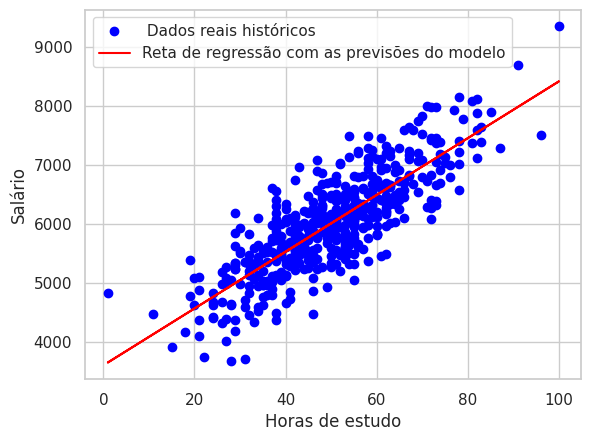

In [ ]:
# Visualização da reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(x, y, color="blue", label = " Dados reais históricos")
plt.plot(x, modelo.predict(x), color="red", label = "Reta de regressão com as previsões do modelo")
plt.xlabel("Horas de estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

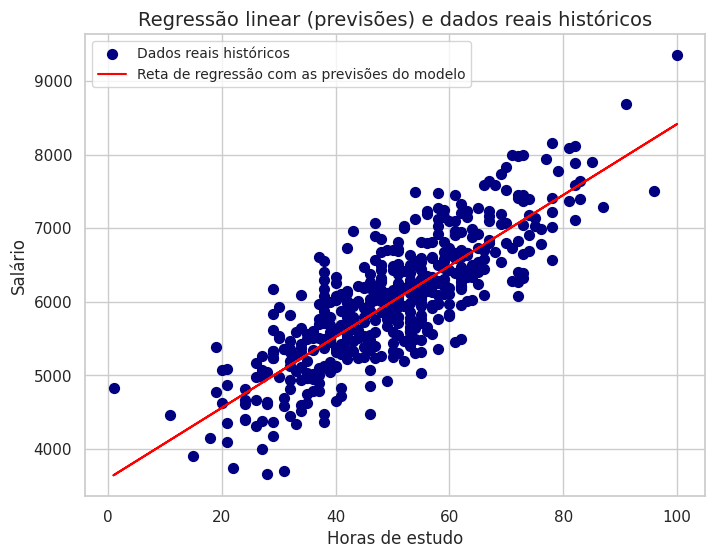

In [ ]:
# Deixando o gráfico mais apresentável

# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Ajustando os dados
plt.scatter(x, y, color="navy", marker="o", s=50, label="Dados reais históricos")
plt.plot(x, modelo.predict(x), color="red", label = "Reta de regressão com as previsões do modelo")
plt.xlabel("Horas de estudo", fontsize=12)
plt.ylabel("Salário", fontsize=12)
plt.title("Regressão linear (previsões) e dados reais históricos", fontsize=14)
plt.legend(fontsize=10)

plt.show()

In [ ]:
# Avaliando o modelo nos dados de teste
#Coeficiente de determinação (0 a 1)
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score: .2f}")

Coeficiente R^2:  0.59


Mesmo não representando o melhor coeficiente, ainda sim é razoável.

**Modelo**

In [ ]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727545

In [ ]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

W0 (intercepto) representa onde a linha de regressão cruza o eixo y. W1 (slope) representa o calculo da inclinação da reta.

Formula: y = W0 + W1 X

# **Deploy do modelo**

In [ ]:
# Definindo um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# Fazendo a previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário ser igual a [5909.5126574]


In [ ]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = W0 + W1 * x
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [ ]:
# Definindo um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [ ]:
# Definindo um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# Previsão do modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

# Arredondando o salário previsto
salario_previsto = round(salario_previsto[0], 2)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a 7114.06
